In [4]:
import numpy as np
import pandas as pd
import analyzer
import columns
import plots
import devices
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
cols = columns.columns_analyzer()
print('Чтение и обработка файла...')
database = analyzer.pass_the_nan(None, cols)  # it's faster to use pickle below
database.to_pickle('main_dataframe.pkl')
# database = pd.read_pickle('main_dataframe.pkl')
data = database

Чтение и обработка файла...


In [6]:
def info_print(the_string):
    print(f'\n\n          {the_string}...\r')


def answering(question, yes='', no='', answer_list=None):
    answer = input(f'  {question}  ')
    if answer_list is None:
        answer_list = {'yes': ['yes', 'ye', 'yeah', 'ok', 'y', 'да', 'ага', 'ок', 'хорошо', 'давай', 'го', 'д', 'lf'],
                       'no': ['no', 'nope', 'nah', 'n', 'нет', 'не', 'не надо', 'н', 'не-а', 'yt', 'ytn']}
    for answer_example in answer_list['yes']:
        if answer == answer_example:
            return yes
    for answer_example in answer_list['no']:
        if answer == answer_example:
            return no


def saving_pkl(dataframe: pd.core, name_file):
    save_path = '/save/' + name_file + '.pkl'
    dataframe.to_pickle(save_path)
    

def average_printer(ex, abs_parameter=True):
    print(f'Среднее значение по {ex}: \r')
    df_average = analyzer.data_average_finder(filter_list=[ex], abs_parameter=abs_parameter)
    if abs_parameter is True:
        str_adder = 'по модулю '
    else:
        str_adder = ''
    for every_value in df_average:
        print(f'Среднее {str_adder}по {every_value} составило {df_average[every_value]}')
    print(f'Распределение значений {ex} (гистограмма): \r')
    plots.histogram([ex], data=database, title=f'Распределение значений {ex} (гистограмма):')


def warning_printer(filter_list_append, warning_param1=1.0, warning_param2=1.5, warn_type='accident',
                    abs_parameter=True, data=database):
    filter_list = ['time']
    for x in filter_list_append:
        filter_list.append(x)
    if warn_type == 'accident':
        warning_param = warning_param2
        warn_str = 'аварийной'
    elif warn_type == 'warning':
        warning_param = warning_param1
        warn_str = 'предупредительной'
    log_warn = analyzer.warning_finder(filter_list=filter_list, abs_parameter=abs_parameter, data=data,
                                       warning_amount=warning_param)
    for every_df in log_warn:
        if every_df.empty is True:
            print(f'Превышение уровней {every_df.axes[1].values[1]} '
                  f'для срабатывания {warn_str} (±{warning_param}) сигнализации не выявлено')
        else:
            print(f'Выявлено превышений (±{warning_param}): {every_df.shape[0]} '
                  f'уровней {every_df.axes[1].values[1]} для срабатывания {warn_str} сигнализации. '
                  f'\n Процент срабатывания {round((every_df.shape[0] / log_total) * 100, 3)}%')
            print(answering('Вывести список?', every_df))


def print_flat_graph(title, input_y, data):
    info_print(title)
    plots.flat_graph(title=title, input_y=input_y, data=data)

In [7]:
info_print('Подсчёт общего количества записей')
log_total = analyzer.total_log_counter(data=database)
print(f'Общее число записей в журнале измерений составило {log_total}')



          Подсчёт общего количества записей...
Общее число записей в журнале измерений составило 19979


In [8]:
info_print('Анализ периодичности и неразрывности измерений')
log_time = analyzer.values_time_analyzer(data=database)
log_time_df = analyzer.values_time_analyzer_df(source_dict=log_time, orient='index')
if len(log_time) == 0:
    print(f'Периоды измерений НКВВ не нарушены')
else:
    print(f'Выявлено {len(log_time)} нарушений периодов измерений НКВВ')
    print(answering('Хотите вывести подробные данные?', yes=log_time_df, no=''))



          Анализ периодичности и неразрывности измерений...
Выявлено 8 нарушений периодов измерений НКВВ
           Дата  Время Дата след. Время след.         Разница
8070   11.10.22  12.17   17.10.22       15.54 6 days 03:36:36
8184   17.10.22  17.47   24.10.22       10.44 6 days 16:57:15
12850  27.10.22  16.29   27.10.22       16.32 0 days 00:03:02
12852  27.10.22  16.33   27.10.22       16.36 0 days 00:02:51
14175  28.10.22  14.39   28.10.22       14.44 0 days 00:05:26
14197  28.10.22  15.05   28.10.22       15.07 0 days 00:02:15
14232  28.10.22  15.42   28.10.22       15.48 0 days 00:06:27
18634  31.10.22  17.09   31.10.22       17.10 0 days 00:00:45


In [9]:
info_print('Анализ периодов массовой некорректности измерений')
log_nans = analyzer.total_nan_counter(data=database, cols=cols)
log_nans_df = analyzer.total_nan_counter_df(source_dict=log_nans, orient='index')
if len(log_nans) == 0:
    print(f"\n Периоды некорректных измерений не выявлены")
else:
    print(f"\n Выявлено {len(log_nans)} замеров с некорректными данными НКВВ")
    print(answering('Хотите вывести примеры некорректных данных?', yes=log_nans_df, no=''))



          Анализ периодов массовой некорректности измерений...

 Выявлено 376 замеров с некорректными данными НКВВ
           Дата  Время  % некорректных замеров
8031   11.10.22  11.39                    76.0
8032   11.10.22  11.40                    76.0
8033   11.10.22  11.41                    76.0
8034   11.10.22  11.42                    76.0
8035   11.10.22  11.43                    76.0
...         ...    ...                     ...
19974  01.11.22  15.30                    82.0
19975  01.11.22  15.31                    82.0
19976  01.11.22  15.32                    82.0
19977  01.11.22  15.33                    82.0
19978  01.11.22  15.34                    82.0

[376 rows x 3 columns]


In [10]:
info_print('Анализ трендов стороны ВН')



          Анализ трендов стороны ВН...


In [11]:
ex1 = '∆tgδ_HV'
ex2 = '∆C_HV'

Анализ корреляции данных ∆tgδ_HV, ∆C_HV от температуры воздуха (при корреляции изменения на графике синхронны)


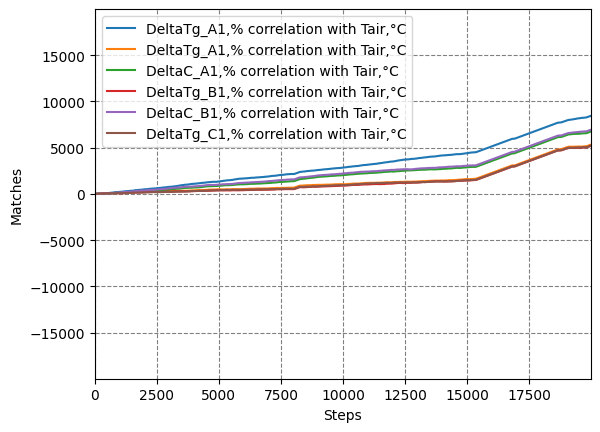

In [12]:
print(f'Анализ корреляции данных {ex1}, {ex2} от температуры воздуха (при корреляции изменения на графике синхронны)')
plots.correlation_plot(filter_list1=[ex1, ex2], filter_list2=['tair'])

Среднее значение по ∆tgδ_HV: 
Среднее по модулю по DeltaTg_A1,% составило 0.205
Среднее по модулю по DeltaTg_B1,% составило 0.213
Среднее по модулю по DeltaTg_C1,% составило 0.207
Распределение значений ∆tgδ_HV (гистограмма): 


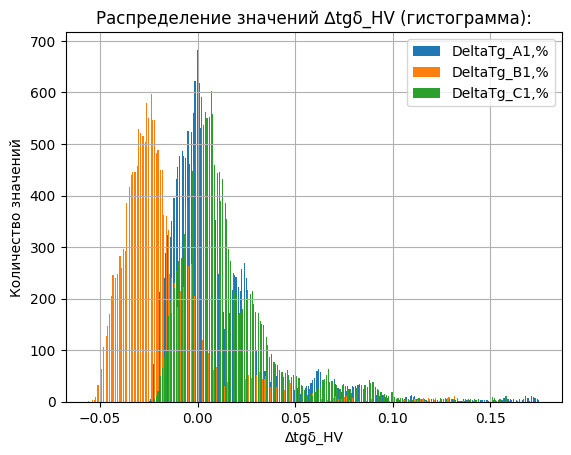

In [13]:
average_printer(ex1, abs_parameter=True)

Среднее значение по ∆C_HV: 
Среднее по модулю по DeltaC_A1,% составило 0.643
Среднее по модулю по DeltaC_B1,% составило 0.629
Среднее по модулю по DeltaC_C1,% составило 0.52
Распределение значений ∆C_HV (гистограмма): 


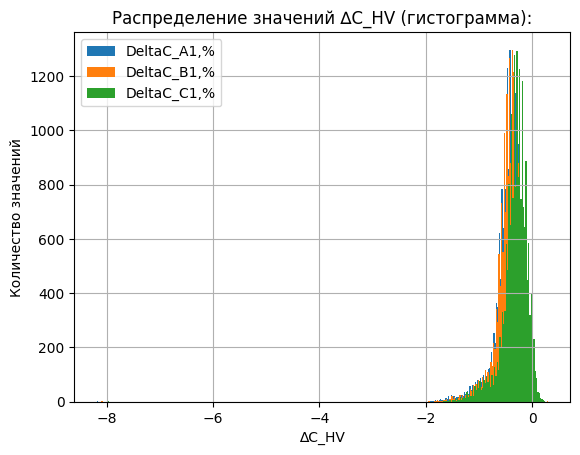

In [14]:
average_printer(ex2, abs_parameter=True)

In [15]:
info_print('Анализ сигнализации со стороны ВН')



          Анализ сигнализации со стороны ВН...


In [16]:
w1 = 1.0
w2 = 1.5
print(f'\nПревышение уровней {ex1} для срабатывания предупредительной (±{w1}) или аварийной (±{w2}) сигнализации: \r')
status = answering('Вывести только срабатывания аварийной сигнализации?', yes='y', no='n')
if status == 'y':
    warning_printer([ex1], w1, w2, 'accident')
elif status == 'n':
    warning_printer([ex1], w1, w2, 'warning')
    warning_printer([ex1], w1, w2, 'accident')


Превышение уровней ∆tgδ_HV для срабатывания предупредительной (±1.0) или аварийной (±1.5) сигнализации: 
Превышение уровней DeltaTg_A1,% для срабатывания аварийной (±1.5) сигнализации не выявлено
Превышение уровней DeltaTg_B1,% для срабатывания аварийной (±1.5) сигнализации не выявлено
Превышение уровней DeltaTg_C1,% для срабатывания аварийной (±1.5) сигнализации не выявлено


In [17]:
w1 = 3.0
w2 = 4.5
print(f'\nПревышение уровней {ex2} для срабатывания предупредительной (±{w1}) или аварийной (±{w2}) сигнализации: \r')
status = answering('Вывести только срабатывания аварийной сигнализации?', yes='y', no='n')
if status == 'y':
    warning_printer([ex2], w1, w2, 'accident', abs_parameter=True)
elif status == 'n':
    warning_printer([ex2], w1, w2, 'warning', abs_parameter=True)
    warning_printer([ex2], w1, w2, 'accident', abs_parameter=True)


Превышение уровней ∆C_HV для срабатывания предупредительной (±3.0) или аварийной (±4.5) сигнализации: 
Выявлено превышений (±3.0): 1 уровней DeltaC_A1,% для срабатывания предупредительной сигнализации. 
 Процент срабатывания 0.005%
     Дата создания записи  DeltaC_A1,%
8240  2022-10-24 11:40:16        -8.18
Выявлено превышений (±3.0): 1 уровней DeltaC_B1,% для срабатывания предупредительной сигнализации. 
 Процент срабатывания 0.005%
     Дата создания записи  DeltaC_B1,%
8240  2022-10-24 11:40:16         -8.1
Выявлено превышений (±3.0): 1 уровней DeltaC_C1,% для срабатывания предупредительной сигнализации. 
 Процент срабатывания 0.005%
     Дата создания записи  DeltaC_C1,%
8240  2022-10-24 11:40:16        -7.98
Выявлено превышений (±4.5): 1 уровней DeltaC_A1,% для срабатывания аварийной сигнализации. 
 Процент срабатывания 0.005%
     Дата создания записи  DeltaC_A1,%
8240  2022-10-24 11:40:16        -8.18
Выявлено превышений (±4.5): 1 уровней DeltaC_B1,% для срабатывания аварийной



          Графики изменения значений напряжений в фазах А, В и С стороны ВН-220кВ...


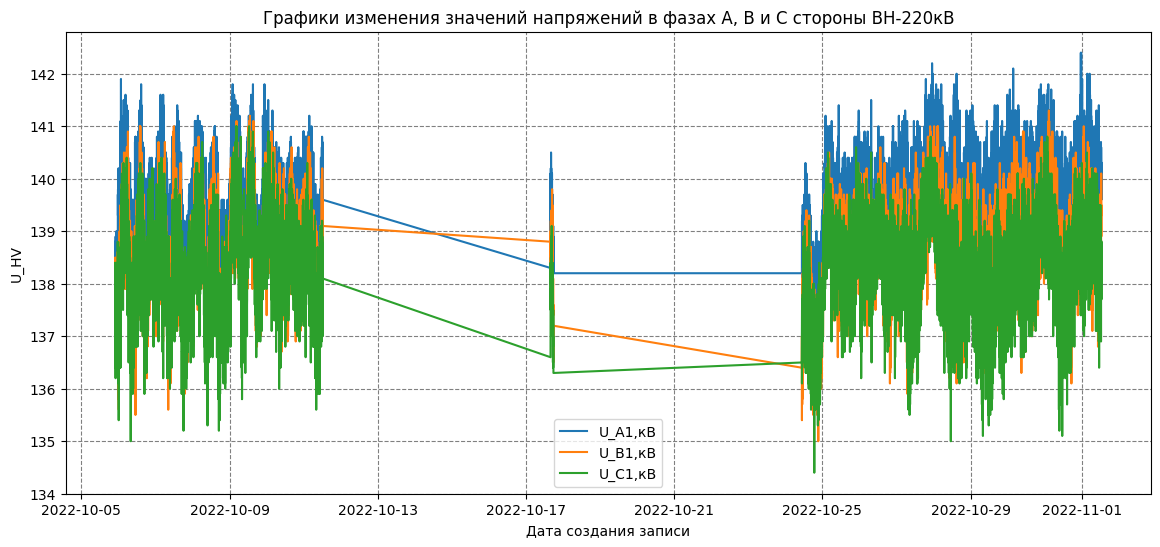

In [18]:
hv1 = 'Графики изменения значений напряжений в фазах А, В и С стороны ВН-220кВ'
print_flat_graph(input_y=['U_HV'], data=database, title=hv1)



          Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны ВН-220кВ...


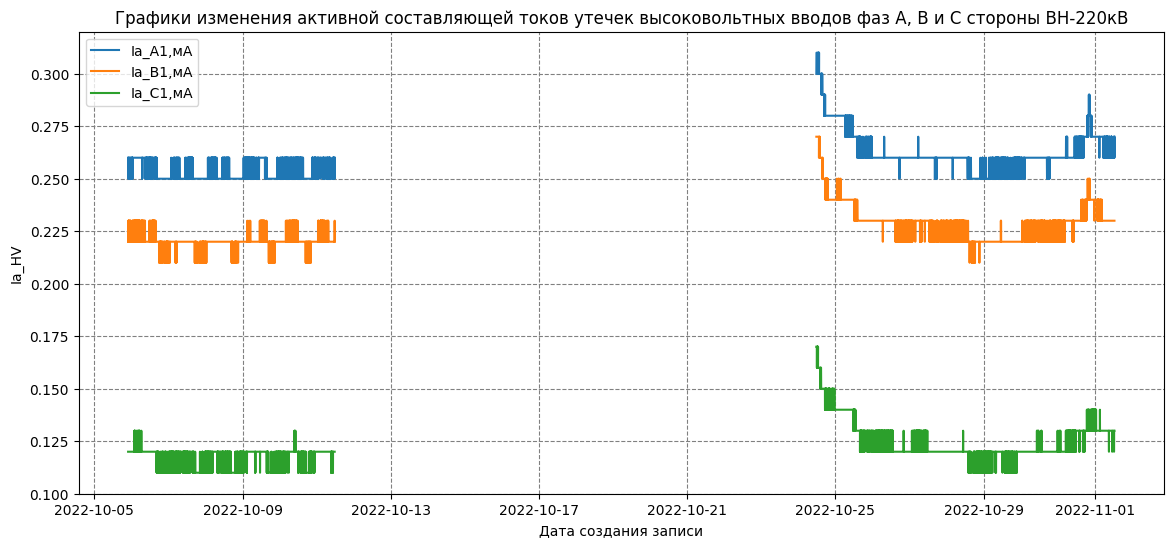

In [19]:
hv2 = 'Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны ВН-220кВ'
print_flat_graph(input_y=['Ia_HV'], data=database, title=hv2)



          Графики изменения реактивной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны ВН-220кВ...


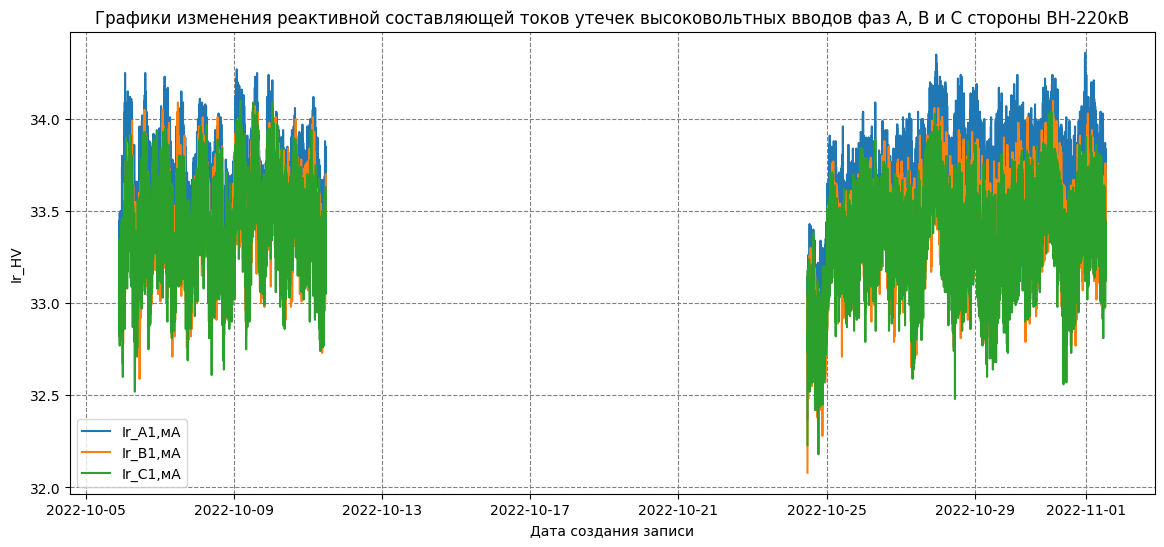

In [20]:
hv3 = 'Графики изменения реактивной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны ВН-220кВ'
print_flat_graph(input_y=['Ir_HV'], data=database, title=hv3)



          Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны ВН-220кВ...


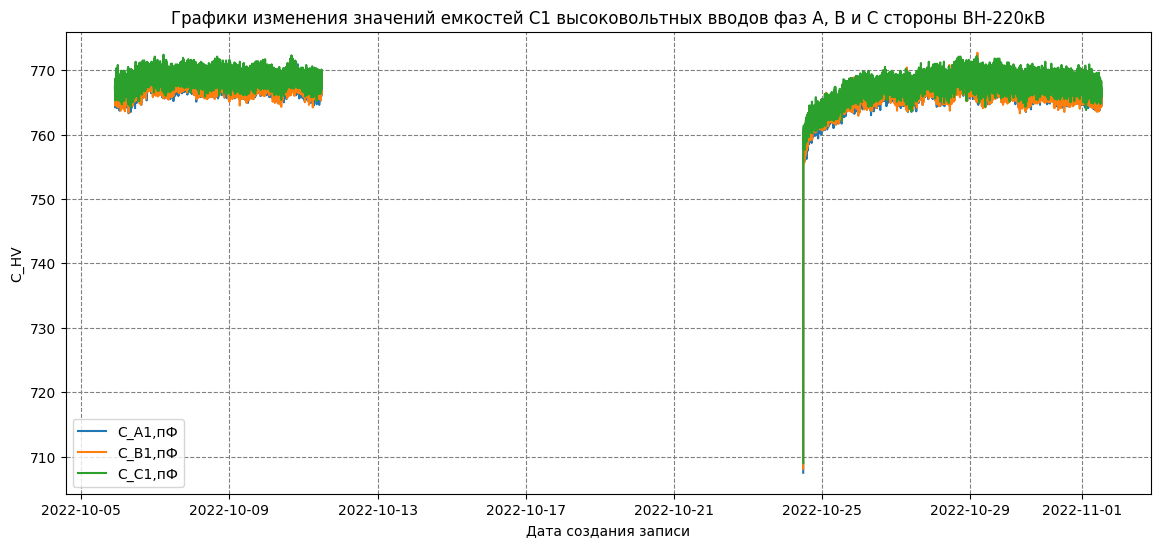

In [21]:
hv5 = 'Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны ВН-220кВ'
print_flat_graph(input_y=['C_HV'], data=database, title=hv5)




          Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов фаз А, В и С стороны ВН-220кВ...


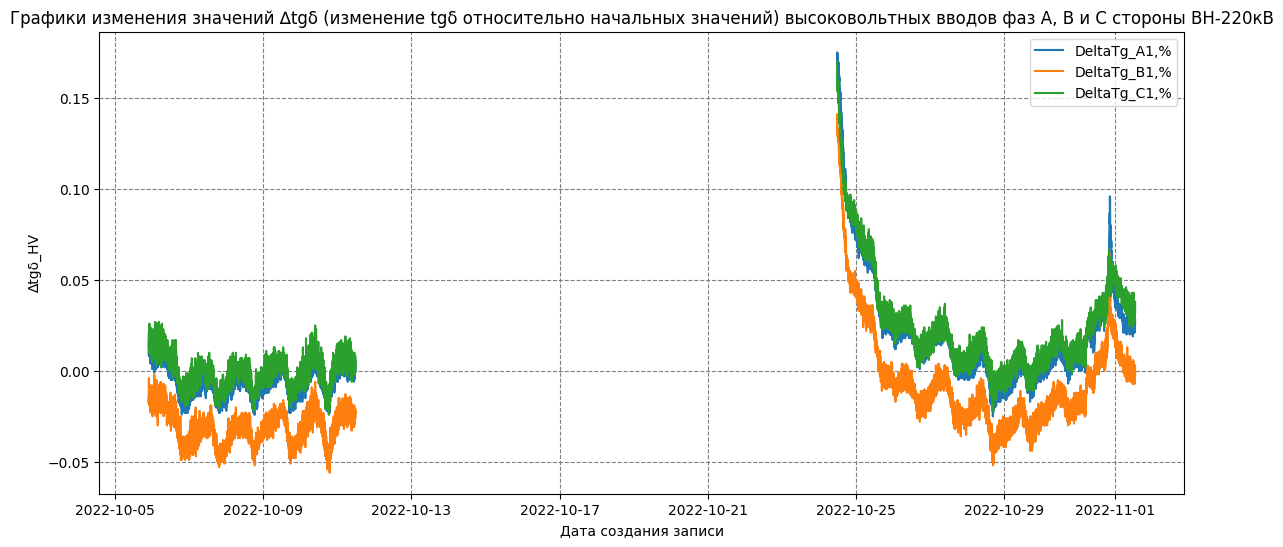

In [22]:
hv6 = 'Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны ВН-220кВ'
print_flat_graph(input_y=['∆tgδ_HV'], data=database, title=hv6)



          Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов фаз А, В и С стороны ВН-220кВ...


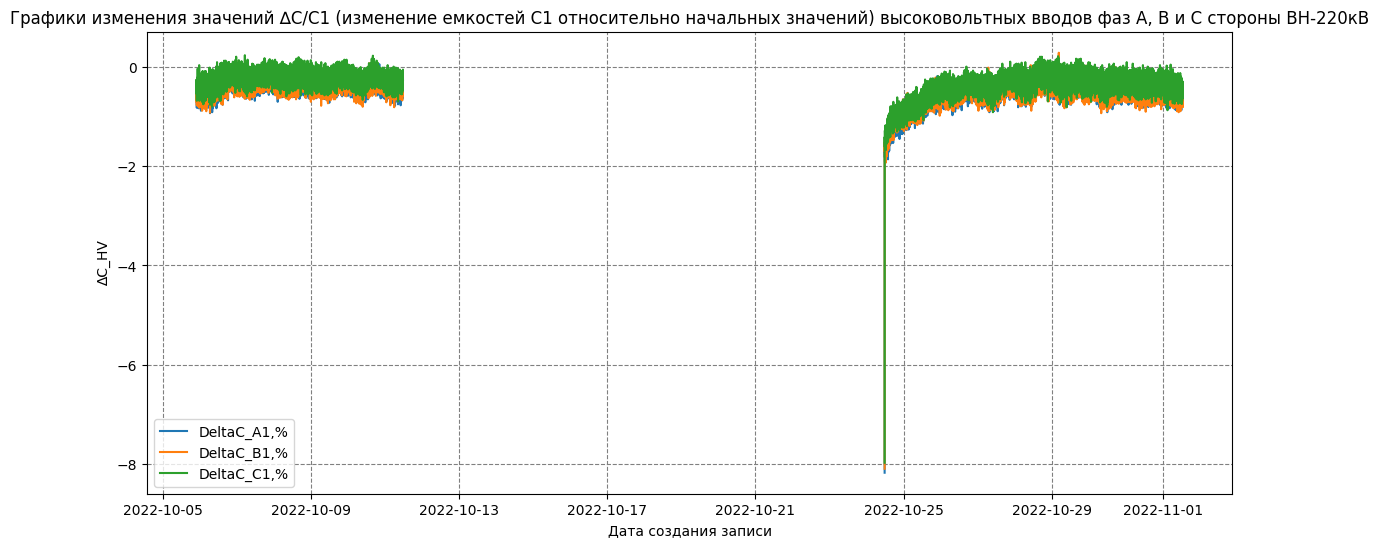

In [23]:
hv7 = 'Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны ВН-220кВ'
print_flat_graph(input_y=['∆C_HV'], data=database, title=hv7)

In [24]:
info_print('Анализ трендов стороны СН')



          Анализ трендов стороны СН...


In [25]:
ex3 = '∆tgδ_MV'
ex4 = '∆C_MV'

Анализ корреляции данных ∆tgδ_MV, ∆C_MV от температуры воздуха (при корреляции изменения на графике синхронны)


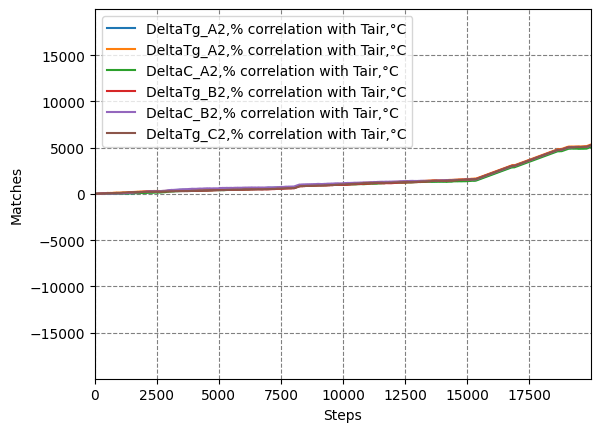

In [26]:
print(f'Анализ корреляции данных {ex3}, {ex4} от температуры воздуха (при корреляции изменения на графике синхронны)')
plots.correlation_plot(filter_list1=[ex3, ex4], filter_list2=['tair'])

Среднее значение по ∆tgδ_MV: 
Среднее по модулю по DeltaTg_A2,% составило 4.206
Среднее по модулю по DeltaTg_B2,% составило 4.399
Среднее по модулю по DeltaTg_C2,% составило 4.303
Распределение значений ∆tgδ_MV (гистограмма): 


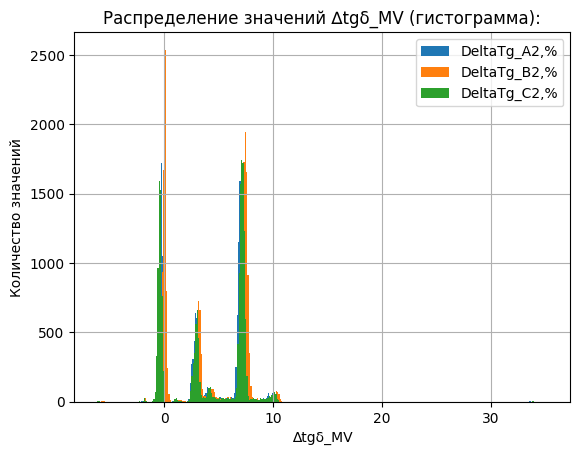

In [27]:
average_printer(ex3, abs_parameter=True)

Среднее значение по ∆C_MV: 
Среднее по модулю по DeltaC_A2,% составило 1.289
Среднее по модулю по DeltaC_B2,% составило 1.284
Среднее по модулю по DeltaC_C2,% составило 0.816
Распределение значений ∆C_MV (гистограмма): 


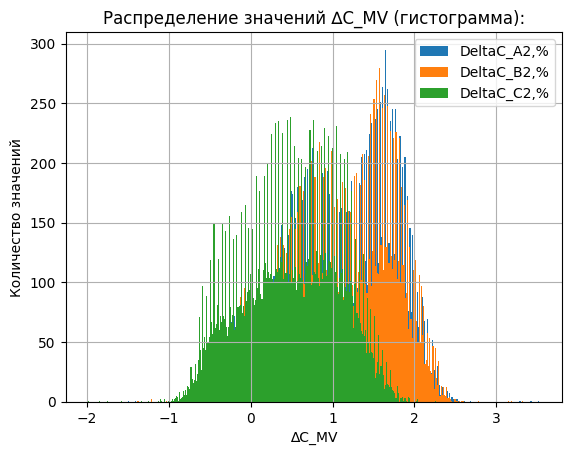

In [28]:
average_printer(ex4, abs_parameter=True)

In [29]:
info_print('Анализ сигнализации со стороны ВН')



          Анализ сигнализации со стороны ВН...


In [30]:
w1 = 1.0
w2 = 1.5
print(f'\nПревышение уровней {ex3} для срабатывания предупредительной (±{w1}) или аварийной (±{w2}) сигнализации: \r')
status = answering('Вывести только срабатывания аварийной сигнализации?', yes='y', no='n')
if status == 'y':
    warning_printer([ex3], w1, w2, 'accident')
elif status == 'n':
    warning_printer([ex3], w1, w2, 'warning')
    warning_printer([ex3], w1, w2, 'accident')


Превышение уровней ∆tgδ_MV для срабатывания предупредительной (±1.0) или аварийной (±1.5) сигнализации: 
Выявлено превышений (±1.0): 12968 уровней DeltaTg_A2,% для срабатывания предупредительной сигнализации. 
 Процент срабатывания 64.908%
      Дата создания записи  DeltaTg_A2,%
0      2022-10-05 21:48:25         8.109
1      2022-10-05 21:49:25         8.219
2      2022-10-05 21:50:25         8.228
3      2022-10-05 21:51:25         8.275
4      2022-10-05 21:52:25         8.205
...                    ...           ...
18458  2022-10-31 14:14:55        -5.781
18459  2022-10-31 14:15:55        -5.492
18460  2022-10-31 14:16:55        -5.483
18461  2022-10-31 14:17:55        -4.505
19811  2022-11-01 12:47:40         8.384

[12968 rows x 2 columns]
Выявлено превышений (±1.0): 12992 уровней DeltaTg_B2,% для срабатывания предупредительной сигнализации. 
 Процент срабатывания 65.028%
      Дата создания записи  DeltaTg_B2,%
0      2022-10-05 21:48:25         8.484
1      2022-10-05 21:49:

In [31]:
w1 = 3.0
w2 = 4.5
print(f'\nПревышение уровней {ex4} для срабатывания предупредительной (±{w1}) или аварийной (±{w2}) сигнализации: \r')
status = answering('Вывести только срабатывания аварийной сигнализации?', yes='y', no='n')
if status == 'y':
    warning_printer([ex4], w1, w2, 'accident', abs_parameter=True)
elif status == 'n':
    warning_printer([ex4], w1, w2, 'warning', abs_parameter=True)
    warning_printer([ex4], w1, w2, 'accident', abs_parameter=True)


Превышение уровней ∆C_MV для срабатывания предупредительной (±3.0) или аварийной (±4.5) сигнализации: 
Выявлено превышений (±3.0): 3 уровней DeltaC_A2,% для срабатывания предупредительной сигнализации. 
 Процент срабатывания 0.015%
     Дата создания записи  DeltaC_A2,%
8241  2022-10-24 11:41:16         3.52
8242  2022-10-24 11:42:16         3.42
8243  2022-10-24 11:43:16         3.29
Выявлено превышений (±3.0): 3 уровней DeltaC_B2,% для срабатывания предупредительной сигнализации. 
 Процент срабатывания 0.015%
     Дата создания записи  DeltaC_B2,%
8241  2022-10-24 11:41:16         3.19
8242  2022-10-24 11:42:16         3.32
8243  2022-10-24 11:43:16         3.14
Превышение уровней DeltaC_C2,% для срабатывания предупредительной (±3.0) сигнализации не выявлено
Превышение уровней DeltaC_A2,% для срабатывания аварийной (±4.5) сигнализации не выявлено
Превышение уровней DeltaC_B2,% для срабатывания аварийной (±4.5) сигнализации не выявлено
Превышение уровней DeltaC_C2,% для срабатывания 



          Графики изменения значений напряжений в фазах А, В и С стороны СН-110кВ...


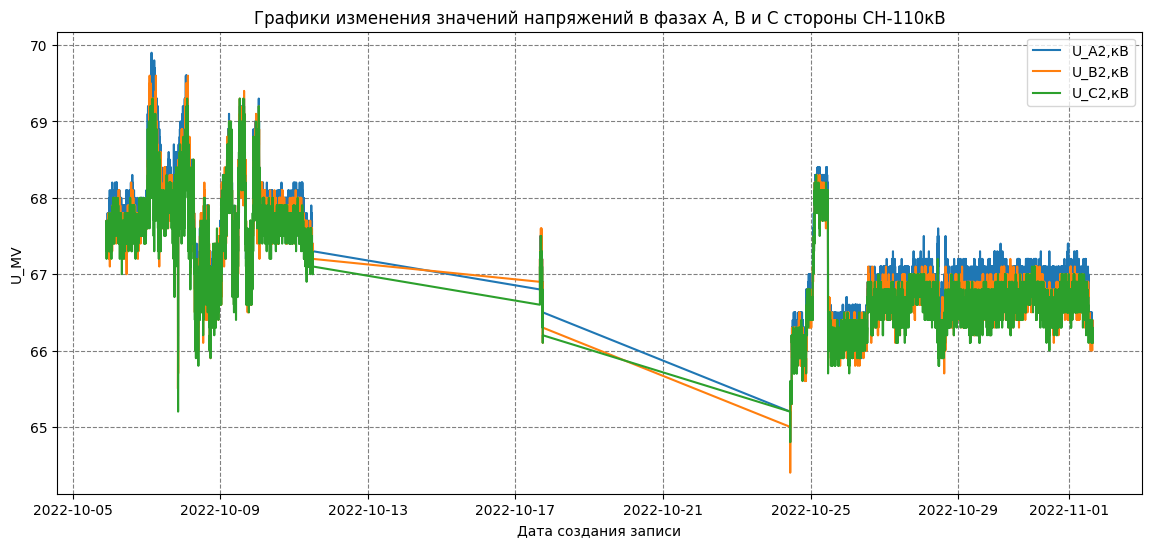

In [32]:
mv1 = 'Графики изменения значений напряжений в фазах А, В и С стороны СН-110кВ'
print_flat_graph(input_y=['U_MV'], data=database, title=mv1)



          Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН-110кВ...


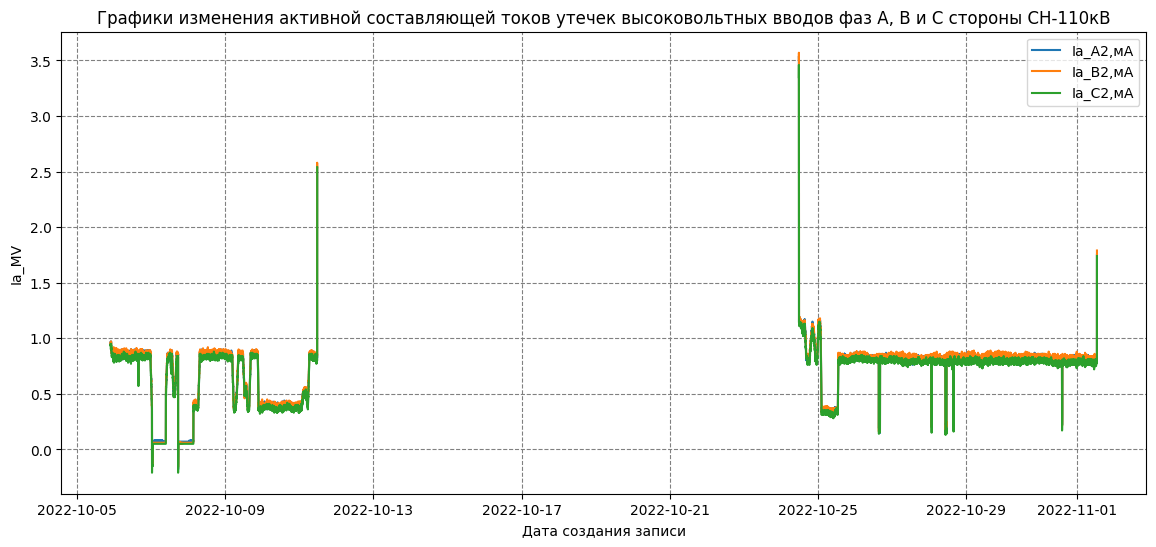

In [33]:
mv2 = 'Графики изменения активной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН-110кВ'
print_flat_graph(input_y=['Ia_MV'], data=database, title=mv2)



          Графики изменения реактивной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН-110кВ...


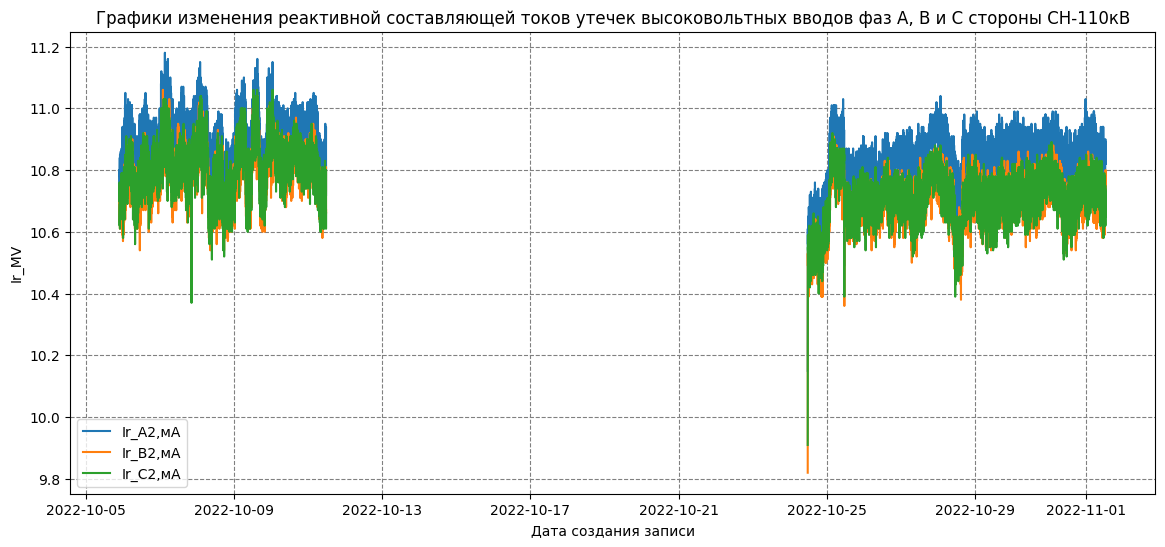

In [34]:
mv3 = 'Графики изменения реактивной составляющей токов утечек высоковольтных вводов фаз А, В и С стороны СН-110кВ'
print_flat_graph(input_y=['Ir_MV'], data=database, title=mv3)



          Графики изменения значений tgδ высоковольтных вводов фаз А, В и С стороны СН-110кВ...


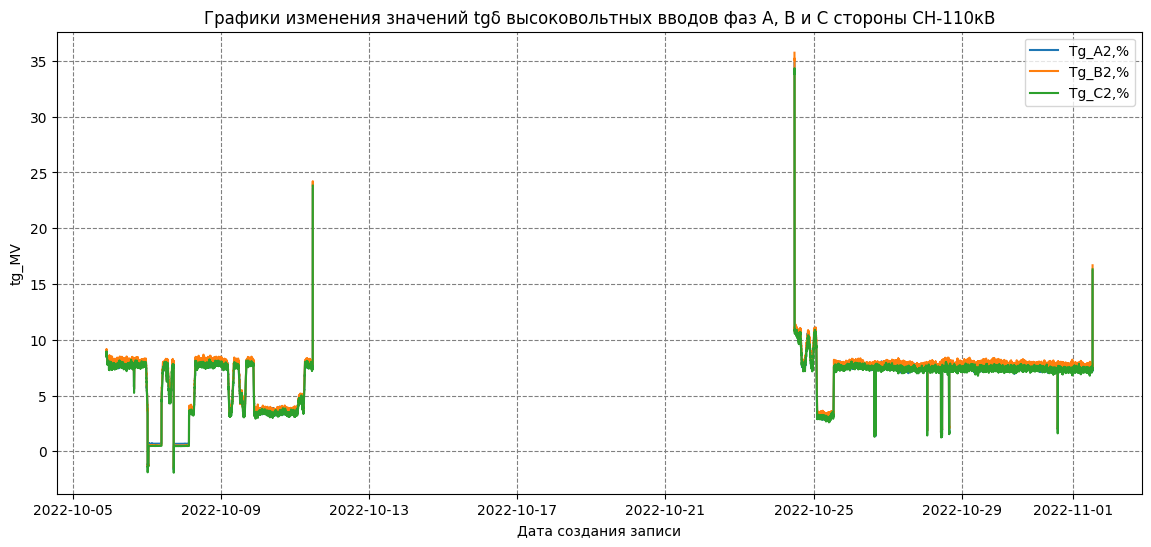

In [35]:
mv4 = 'Графики изменения значений tgδ высоковольтных вводов фаз А, В и С стороны СН-110кВ'
print_flat_graph(input_y=['tg_MV'], data=database, title=mv4)



          Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны СН-110кВ...


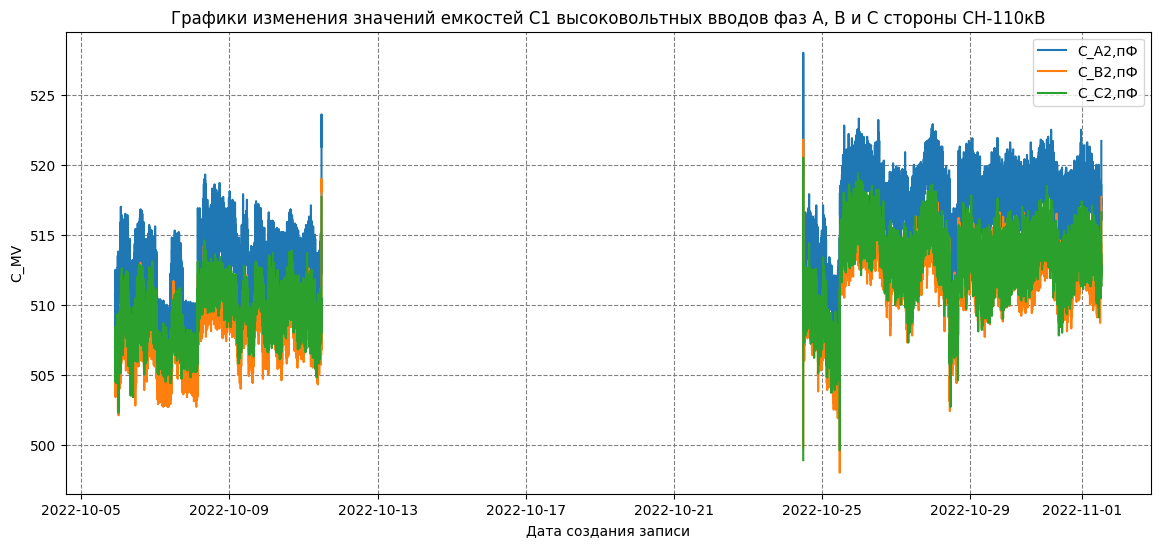

In [36]:
mv5 = 'Графики изменения значений емкостей С1 высоковольтных вводов фаз А, В и С стороны СН-110кВ'
print_flat_graph(input_y=['C_MV'], data=database, title=mv5)



          Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов фаз А, В и С стороны СН-110кВ...


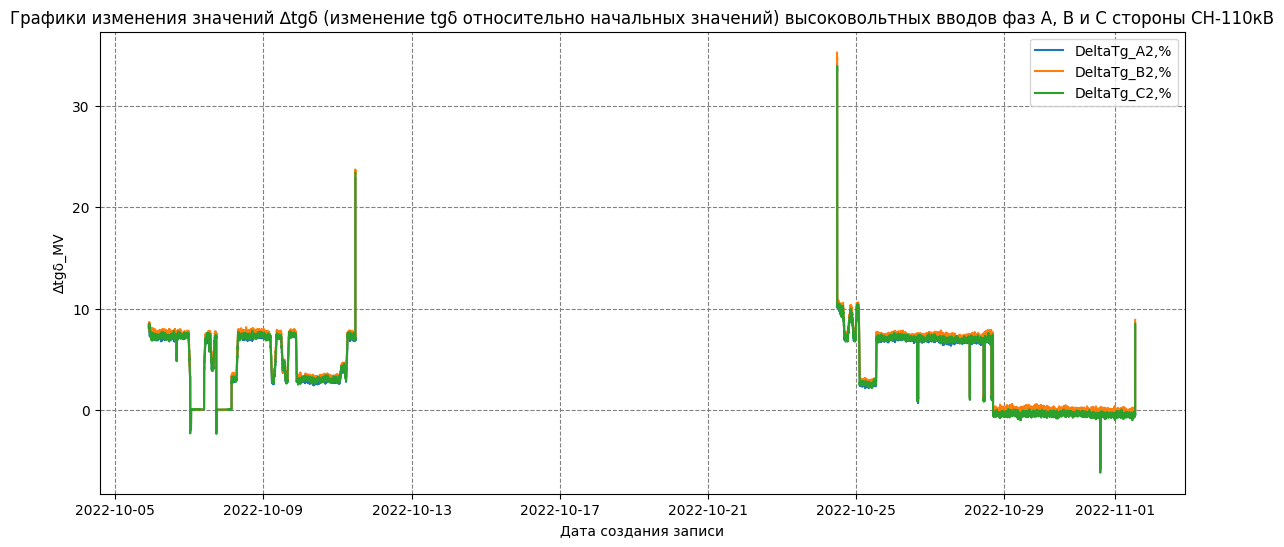

In [37]:
mv6 = 'Графики изменения значений ∆tgδ (изменение tgδ относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны СН-110кВ'
print_flat_graph(input_y=['∆tgδ_MV'], data=database, title=mv6)



          Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов фаз А, В и С стороны СН-110кВ...


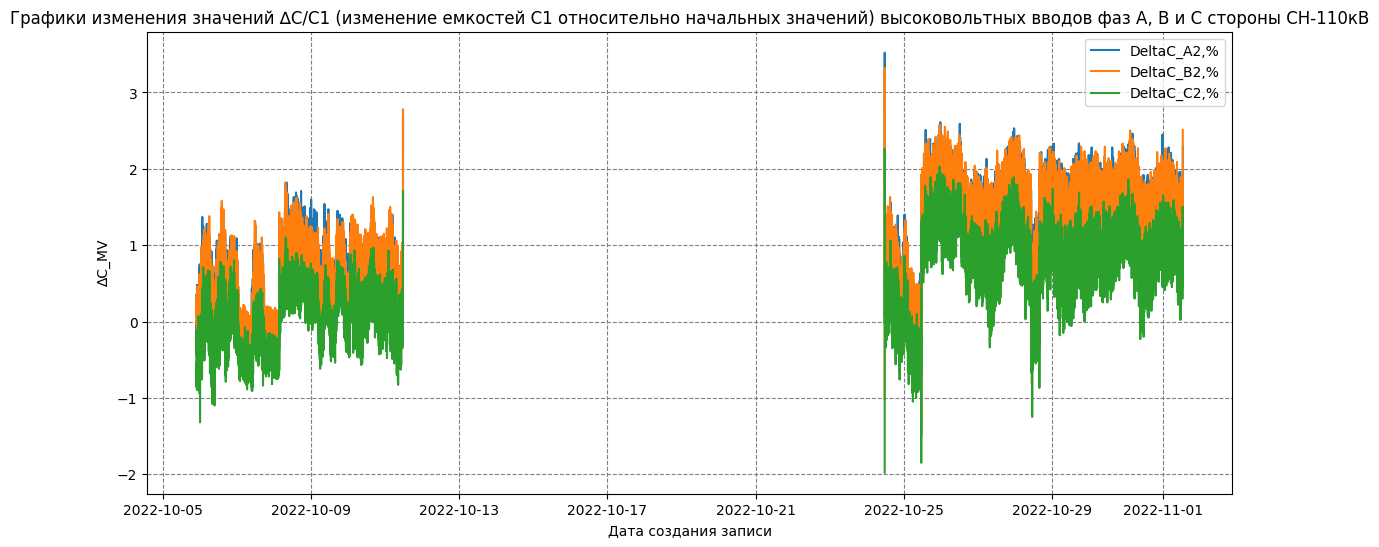

In [38]:
mv7 = 'Графики изменения значений ∆C/C1 (изменение емкостей С1 относительно начальных значений) высоковольтных вводов' \
      ' фаз А, В и С стороны СН-110кВ'
print_flat_graph(input_y=['∆C_MV'], data=database, title=mv7)